In [1]:
# 라이러리 임포트

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import  metrics
from sklearn.metrics import accuracy_score

np.random.seed(5)
 

## iris 데이터 시각화

In [2]:
# iris 데이터를 불러옴
dataset = load_iris()

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 분류값을 데이터프레임에 저장
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [5]:
# 숫자인 분류값의 이해를 돕기 위해 문자로 변경
df.target = df.target.map({0:'setosa', 1:'vesicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### iris 데이터의 분포도 확인
- iris 데이터의 분포도를 확인해보도록 하겠습니다. 결과를 통해서, iris의 데이터 분포도가 정규분포(Gaussian Distribution)를 이루고 있는지를 확인합니다.

In [6]:
# 분류값 별로 데이터 프레임을 나눕니다.
setosa_df = df[df.target == 'setosa']
vesicolor_df = df[df.target == 'vesicolor']
virginica_df = df[df.target == 'virginica']

## setosa sepal length (cm)

<AxesSubplot:>

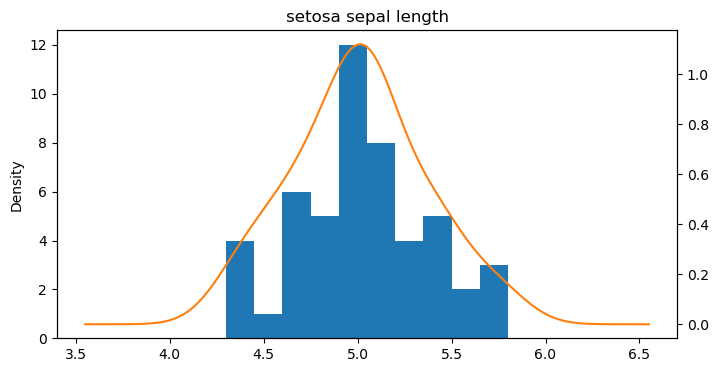

In [7]:
ax = setosa_df['sepal length (cm)'].plot(kind = 'hist')
setosa_df['sepal length (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='setosa sepal length', figsize=(8, 4)) 



## vesicolor sepal length (cm)

<AxesSubplot:>

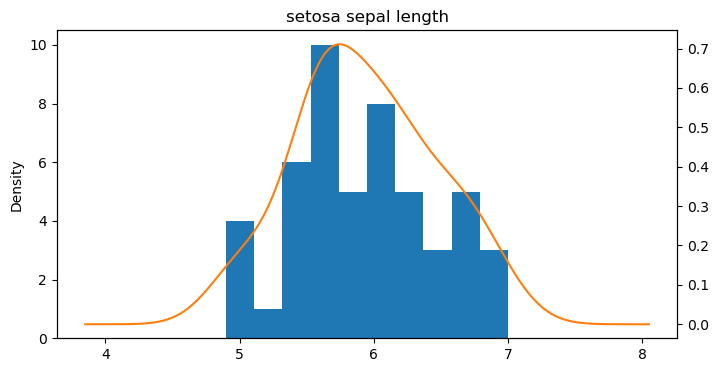

In [8]:
ax = vesicolor_df['sepal length (cm)'].plot(kind = 'hist')
vesicolor_df['sepal length (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='setosa sepal length', figsize=(8, 4)) 



## virginica sepal length (cm)

<AxesSubplot:>

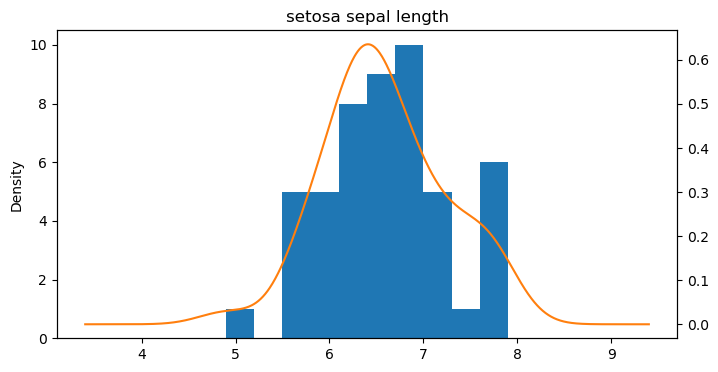

In [9]:
ax = virginica_df['sepal length (cm)'].plot(kind = 'hist')
virginica_df['sepal length (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='setosa sepal length', figsize=(8, 4)) 



<AxesSubplot:>

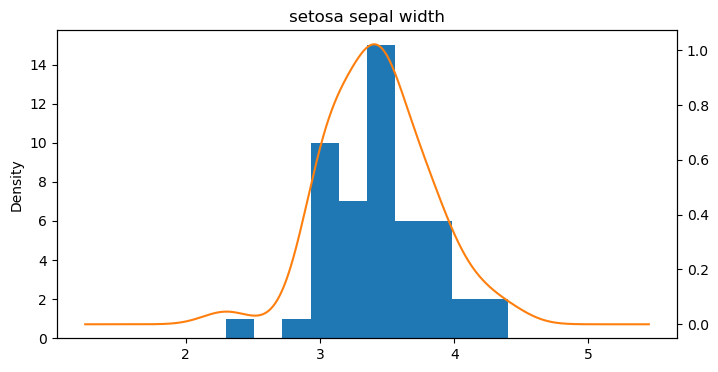

In [10]:
ax = setosa_df['sepal width (cm)'].plot(kind = 'hist')
setosa_df['sepal width (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='setosa sepal width', figsize=(8, 4)) 

<AxesSubplot:>

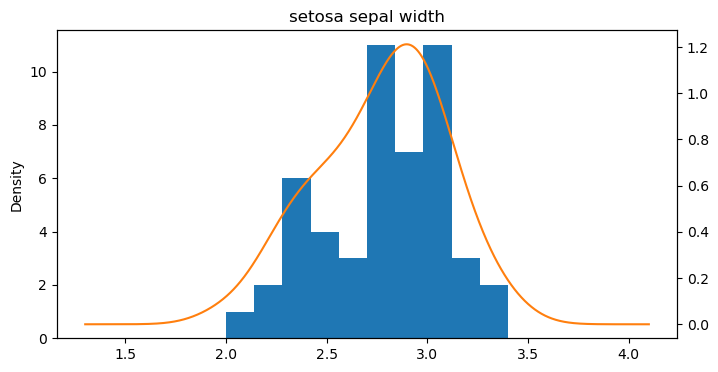

In [11]:
ax = vesicolor_df['sepal width (cm)'].plot(kind = 'hist')
vesicolor_df['sepal width (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='vesicolor sepal width', figsize=(8, 4)) 

<AxesSubplot:>

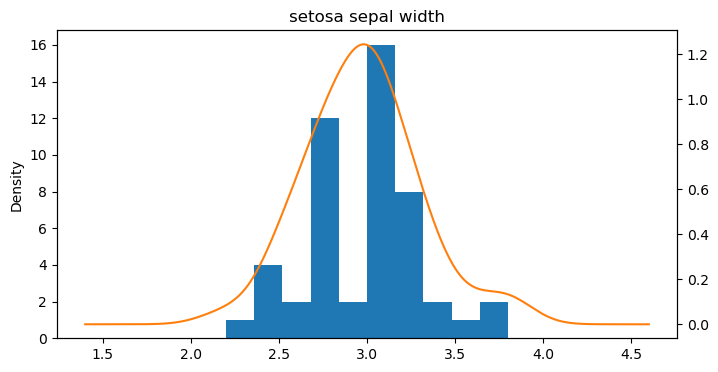

In [12]:
ax = virginica_df['sepal width (cm)'].plot(kind = 'hist')
virginica_df['sepal width (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='virginica sepal width', figsize=(8, 4)) 

<AxesSubplot:>

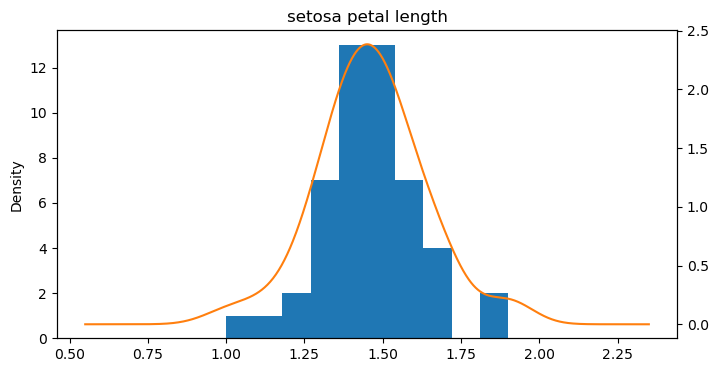

In [14]:
ax = setosa_df['petal length (cm)'].plot(kind = 'hist')
setosa_df['petal length (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='setosa petal length', figsize=(8, 4)) 

<AxesSubplot:>

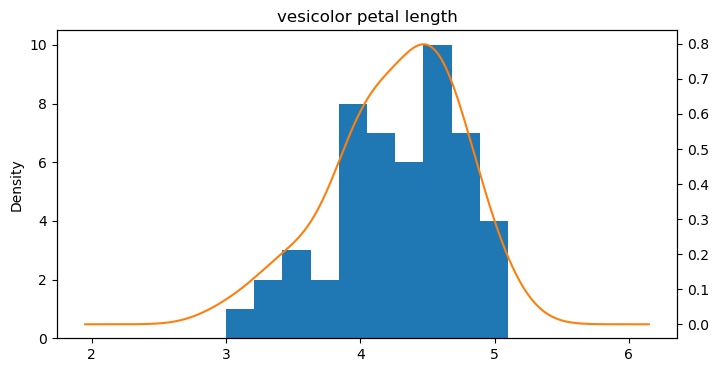

In [15]:
ax = vesicolor_df['petal length (cm)'].plot(kind = 'hist')
vesicolor_df['petal length (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='vesicolor petal length', figsize=(8, 4)) 

<AxesSubplot:>

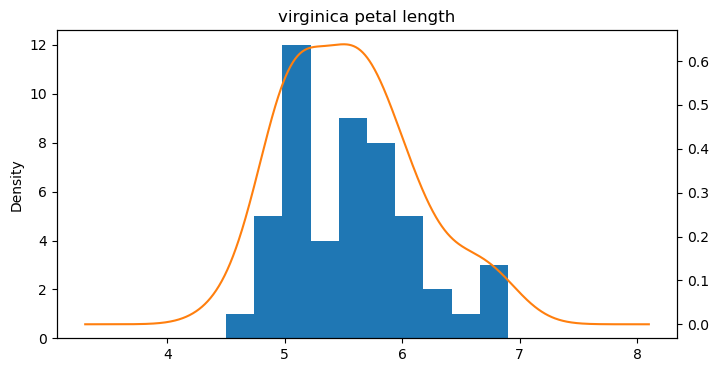

In [16]:
ax = virginica_df['petal length (cm)'].plot(kind = 'hist')
virginica_df['petal length (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='virginica petal length', figsize=(8, 4)) 

<AxesSubplot:>

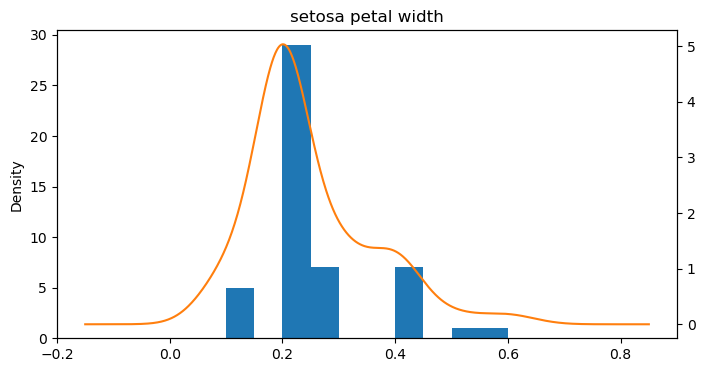

In [17]:
ax = setosa_df['petal width (cm)'].plot(kind = 'hist')
setosa_df['petal width (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='setosa petal width', figsize=(8, 4)) 

<AxesSubplot:>

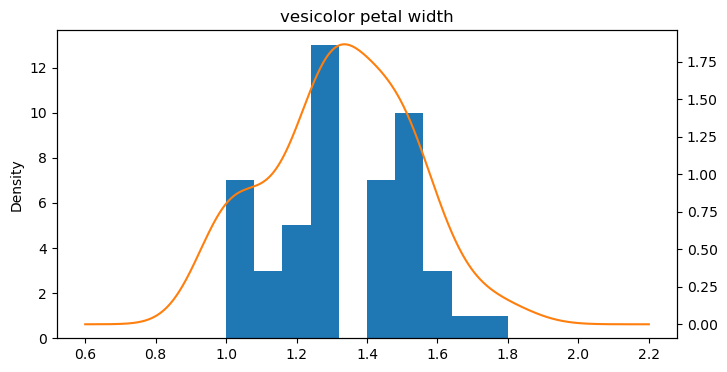

In [18]:
ax = vesicolor_df['petal width (cm)'].plot(kind = 'hist')
vesicolor_df['petal width (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='vesicolor petal width', figsize=(8, 4)) 

<AxesSubplot:>

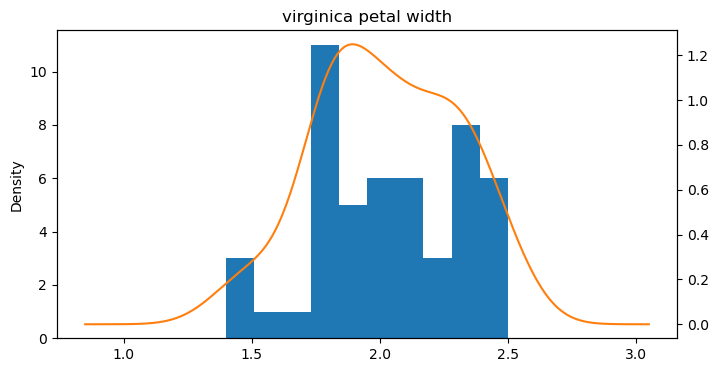

In [19]:
ax = virginica_df['petal width (cm)'].plot(kind = 'hist')
virginica_df['petal width (cm)'].plot(kind = 'kde',  # 밀도로 출력 'kde'
                                    ax = ax, secondary_y =True, title='virginica petal width', figsize=(8, 4)) 

## 데이터를 학습 데이터와 테스트 데이터로 나누기

In [20]:
## 20%를 테스트 데이터로 분류합니다.
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2)

### Gaussian Naive Bayes 분류하기

In [25]:
# 학습데이터로 모델을 학습합니다.
model = GaussianNB()
model.fit(X_train, y_train)

# 테스트 데이터로 모델을 테스트합니다.
pred = model.predict(X_test)

In [27]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

